In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import sys
import ternary
import pymatgen as mg

# add modules
module_dir = '../modules'
if module_dir not in sys.path:
    sys.path.append(module_dir)
    
from bca_plotting import get_coords_from_comp, get_comp_from_coords
from file_load import BCA_formula_from_str

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
datadir = '../data'

# Pure metal volcano plot

In [13]:
volcano_data = pd.read_csv(os.path.join(datadir,'MetalVolcanoData.csv'),skipfooter=2,engine='python')

elmt_data = volcano_data[volcano_data['Element']!='Curve']
curve_data = volcano_data[volcano_data['Element']=='Curve']

<IPython.core.display.Javascript object>


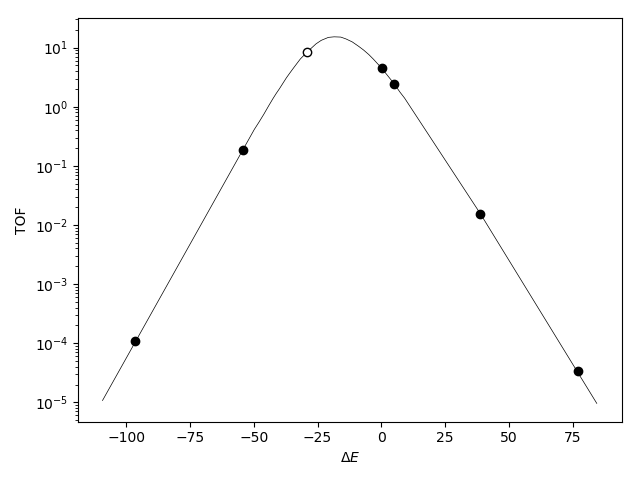

In [159]:
fig, ax = plt.subplots()

# plot curve
ax.plot(curve_data['E'],curve_data['TOF'],c='k',zorder=0,lw=0.5)
# plot pure metals
ax.scatter(elmt_data[elmt_data['Element']!='CoMo']['E'],elmt_data[elmt_data['Element']!='CoMo']['TOF'],c='k')
# plot CoMo
ax.scatter(elmt_data[elmt_data['Element']=='CoMo']['E'],elmt_data[elmt_data['Element']=='CoMo']['TOF'],edgecolors='k',
           facecolors='white',zorder=1
          )

ax.set_yscale('log')
ax.set_xlabel('$\Delta E$')
ax.set_ylabel('TOF')

fig.tight_layout()

# BCA phase diagram at 1250C

<IPython.core.display.Javascript object>


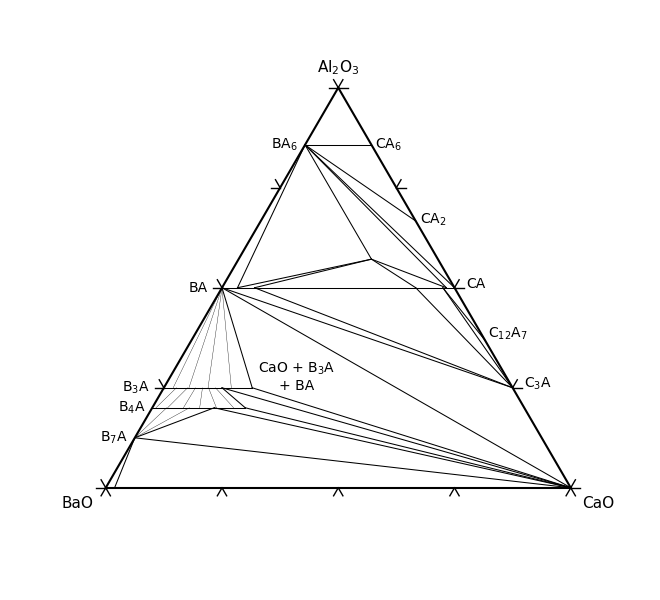

In [190]:
ped_data = pd.read_csv(os.path.join(datadir,'BCA_PED_coords.csv'),skipfooter=2,engine='python')
for col in ['start','end']:
    ped_data[f'{col}_comp'] = ped_data[f'{col}'].map(lambda x: mg.Composition(BCA_formula_from_str(x)))
    ped_data[f'{col}_coords'] = ped_data[f'{col}_comp'].map(get_coords_from_comp)

fig, ax = plt.subplots(figsize=(6.6,6))
tax = ternary.TernaryAxesSubplot(ax=ax)

tax.boundary()
ax.axis('off')

for i, row in ped_data.iterrows():
    if row['type']=='boundary':
        lw=0.75
    elif row['type']=='tie':
        lw=0.25
    tax.line(row['start_coords'],row['end_coords'],lw=lw,c='k')
    
tern_labels = ['CaO','Al$_2$O$_3$','BaO']
add_labeloffset=0.0
tax.right_corner_label(tern_labels[0],fontsize=11,va='center',offset=0.08+add_labeloffset)
tax.top_corner_label(tern_labels[1],fontsize=11,va='center',offset=0.05+add_labeloffset)
tax.left_corner_label(tern_labels[2],fontsize=11,va='center',offset=0.08+add_labeloffset)
    
# structure labels
tax.annotate('BA$_6$',(-0.015,0.857,0.143),ha='right',va='center')
tax.annotate('BA',(-0.03,0.5,0.5),ha='right',va='center')
tax.annotate('B$_3$A',(-0.03,0.25,0.75),ha='right',va='center')
tax.annotate('B$_4$A',(-0.015,0.2,0.8),ha='right',va='center')
tax.annotate('B$_7$A',(-0.015,0.125,0.875),ha='right',va='center')

tax.annotate('CaO + B$_3$A\n+ BA',(0.27,0.28,0.45),ha='center',va='center')
tax.annotate('C$_3$A',(0.77,0.26,0),ha='left',va='center')
tax.annotate('C$_{12}$A$_7$',(0.63,0.385,0),ha='left',va='center')
tax.annotate('CA',(0.52,0.51,0),ha='left',va='center')
tax.annotate('CA$_2$',(0.34,0.67,0),ha='left',va='center')
tax.annotate('CA$_6$',(0.15,0.857,0),ha='left',va='center')

tax.ticks(multiple=0.25,tick_formats='',offset=0.02,lw=1)
tax.ticks(multiple=0.25,tick_formats='',offset=0.02,clockwise=True,lw=1)

In [187]:
get_coords_from_comp(mg.Composition(BCA_formula_from_str('BCA701')))

array([0.   , 0.125, 0.875])

In [136]:
help(tax.ticks)

Help on method ticks in module ternary.ternary_axes_subplot:

ticks(ticks=None, locations=None, multiple=1, axis='blr', clockwise=False, axes_colors=None, tick_formats=None, **kwargs) method of ternary.ternary_axes_subplot.TernaryAxesSubplot instance

